In [1]:
from gameworlds.hex_world import HexState, HexAction
from actor_net import ActorNet
import numpy as np

In [2]:
def get_action():
    action = input("Please enter position on the format XY, where X=row and Y=col: ")

    row = int(action[0])
    col = int(action[1])

    return HexAction(row, col)

In [3]:
dim = 3

In [4]:
def play_game(player1=None, player2=None):
    state = HexState.empty_board()
    
    while not state.is_final_state:
        state.plot(labels=True)
        if state.player == 1:
            if player1 is None:
                move = get_action()
            else:
                move = player1.select_action(state)

              
        else:
            if player2 is None:
                move = get_action()
            else:
                move = player2.select_action(state)

        state = state.do_action(move)
        # clear_output(wait=True)
    state.plot(labels=True)
    print(f"Player {-state.player} won!")

In [6]:
anet99 = ActorNet(input_shape=(2*dim**2), output_dim=(dim**2))
anet99.load_params(99, suffix="3x3_cr")


anet40 = ActorNet(input_shape=(2*dim**2), output_dim=(dim**2))
anet40.load_params(40, suffix="3x3_cr")

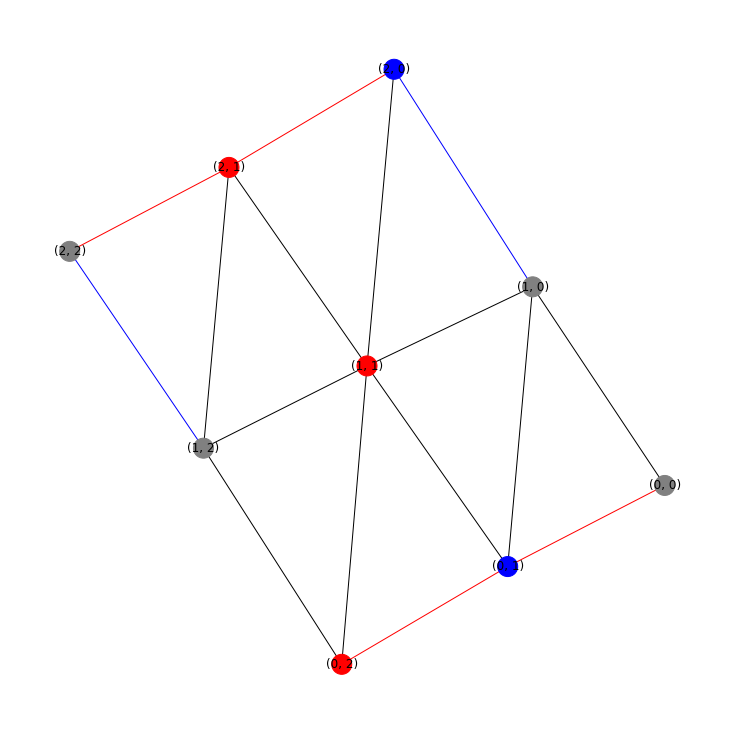

Player 1 won!


In [16]:
play_game(player1=anet99, player2=None)